# Using Principal Component Analysis to Reduce the Dimensionality of a Dataset of Fish Species

The aim of this program is to employ Principal Component Analysis (PCA) on a simple dataset of fish species to reduce the dimensionality from five dimesnions to two. PCA identifies the directions of greatest variance in the data by computing the principal components, then performs a change of basis on the data by projecting it onto a limited number of these principal components. In this way the number of features in the data can be reduced whilst the variance in the remaining features is preserved. This is important for the performance of the Machine Learning model.

We begin by reading the data into a data frame.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore

df = pd.read_csv('fish_data.csv', header = None)
# name the columns
col_names = ['species', 'feature1', 'feature2', 'feature3', 'feature4',\
             'feature5', 'feature6']
df.columns = col_names
df.head(10)

,species,feature1,feature2,feature3,feature4,feature5,feature6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
5,Bream,450.0,26.8,29.7,34.7,39.2,14.2
6,Bream,500.0,26.8,29.7,34.5,41.1,15.3
7,Bream,390.0,27.6,30.0,35.0,36.2,13.4
8,Bream,450.0,27.6,30.0,35.1,39.9,13.8
9,Bream,500.0,28.5,30.7,36.2,39.3,13.7


We can see that the feature 1 values are an order of magnitude larger than the rest, and the feature 6 values are around half those of features 2-5. Therefore, mean-normalising the features will not suffice on this occasion and we will employ feature scaling. We can do this with scipy's zscore function. The z-score is defined as $$Z = \frac{x - \mu}{\sigma}$$ where $x$ is the observed value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.

In [17]:
# scale the features and drop the species column 
df = df.iloc[:, 1:].apply(zscore)
# view scaled features
df.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6
0,-0.501097,-0.368786,-0.343234,-0.237815,1.003212,0.253740
1,-0.374343,-0.297502,-0.268935,-0.146348,1.158696,0.443765
2,-0.242308,-0.306413,-0.252424,-0.153970,1.139261,1.061347
3,-0.181572,-0.092563,-0.046036,0.028965,0.964342,0.206233
4,-0.004645,-0.074743,-0.046036,0.067076,0.828293,1.061347
5,0.048170,-0.048011,0.011752,0.120432,1.080954,0.633790
6,0.180205,-0.048011,0.011752,0.105187,1.265591,1.156360
7,-0.110273,0.023272,0.036518,0.143299,0.789422,0.253740
8,0.048170,0.023272,0.036518,0.150921,1.148978,0.443765
9,0.180205,0.103465,0.094307,0.234766,1.090672,0.396259


The goal of PCA is to reduce the dimensionality of the data, whilst also maximising variance and reducing redundancy in the remaining features. This corresponds to diagonalising the covariance matrix of $X$, as the diagonal elements represent variance (spread of data around the mean), and the off-diagonal elements represent feature redundancy (covariance - the correlational relationships between different features).

We start off with the covariance matrix $C_X$ defined by $C_X = \frac{1}{m}XX^T$, of the data $X$ which has $n$ features and $m$ samples.

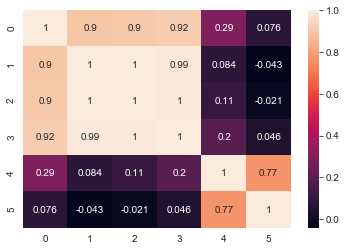

In [18]:
# assign the features to X
X = df.values
# m is the number of samples, n is the number of features
m, n = X.shape
# calculate the covariance matrix C_X
C_X = ((1/m)*np.dot(X.T, X))
# view C_X
fig = plt.figure()
ax = sns.heatmap(C_X, annot = True)

We want to project the data $X$ onto a lower-dimensionality space $Z$ in such a way that the covariance matrix $C_Z = \frac{1}{m}ZZ^T$ is diagonal. We do this by applying the transformation $Z = U^TX$, where $U$ has the dimensions $(n \times k)$, $k<n$. $X$ has dimensions $(n \times m)$, therefore $Z$ will have the dimensions  $(k \times n)\cdot(n \times m)=(k \times m)$, i.e., the features have been reduced from $n$ to $k$.

It can be shown that the $U$ that produces the diagonal covariance matrix $C_Z$ is composed of the orthonormal eigenvectors of $C_X$. Therefore, we proceed by finding the eigenvalues and eigenvectors of $C_X$.

In [19]:
# calculate the eigenvalues and eigenvectors of C_X
eigenvals, eigenvecs = np.linalg.eig(C_X)
print('Eigenvalues:')
print(eigenvals)
print('\n')
print('Eigenvectors:')
print(eigenvecs)

Eigenvalues:
[3.89974197e+00 1.76002637e+00 2.40373998e-01 9.91712352e-02
 1.29916086e-04 5.56515808e-04]


Eigenvectors:
[[ 4.82436240e-01  2.29692711e-02 -3.30179106e-01  8.10968282e-01
   6.31103609e-03  2.48122808e-04]
 [ 4.96621622e-01 -1.20740658e-01  1.74024891e-01 -2.25946074e-01
   6.34567759e-01 -5.04753531e-01]
 [ 4.98907207e-01 -1.01658466e-01  1.58914364e-01 -2.23188963e-01
  -7.62910895e-01 -2.89235256e-01]
 [ 5.03418214e-01 -3.84662570e-02  8.59665344e-02 -2.64595558e-01
   1.23417004e-01  8.07748499e-01]
 [ 1.27925132e-01  6.87801239e-01 -6.17390765e-01 -3.46925836e-01
   9.33336166e-04 -9.50518420e-02]
 [ 4.38075428e-02  7.07113474e-01  6.68492123e-01  2.26046808e-01
   4.27407804e-03  8.61905647e-03]]


Now we can construct $U$ from the eigenvectors of $C_X$. In particular, we will be using the first two primary components.

In [20]:
# we want to identify the first two primary components for a projection into 2 dimensions
# the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
# the first two returned eigenvectors are the first two primary components
first_component = eigenvecs[:,0]
second_component = eigenvecs[:,1]
# check orthogonality of primary components
print('The dot product of the two primary components is equal to {:.1f}'.format(np.inner(first_component, second_component)))
# construct U from the primary components
U = np.stack((first_component, second_component), axis = 1)
# view U
print('U:')
print(U)

The dot product of the two primary components is equal to 0.0
U:
[[ 0.48243624  0.02296927]
 [ 0.49662162 -0.12074066]
 [ 0.49890721 -0.10165847]
 [ 0.50341821 -0.03846626]
 [ 0.12792513  0.68780124]
 [ 0.04380754  0.70711347]]


Finally, we project the five-dimensional data onto two-dimensional space with $Z = U^TX$. $Z$ will have the dimensions $(2 \times n) \cdot (n \times m) = (2 \times m)$. We will also check that $C_Z$ is diagonal.

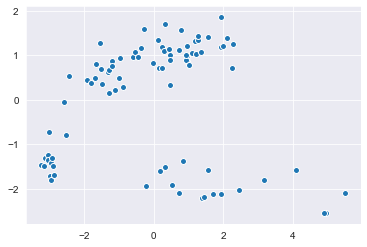

In [21]:
# project the data onto 2 dimensions using U
Z = np.dot(X, U)
# plot the projected data in 2 dimensions
sns.set_style('darkgrid')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z[:,0], Z[:, 1], edgecolor = 'white')
plt.show()

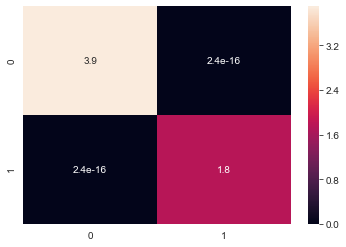

In [22]:
C_Z = (1/m)*np.dot(Z.T, Z)
# visualise the matrix
fig = plt.figure()
ax = sns.heatmap(C_Z, annot = True)

As we can see, $C_Z$ is diagonal; the off diagonal elements are zero and the diagonal elements are non-zero.